#  first analysis 

if you think that there should be more things to analize deeper or if anything isn't clear just let me know. if you also found out something usefull that is not listed here, add it 


In [9]:
import numpy as np
import os
import pandas as pd
from scipy.sparse import *
from tqdm import tqdm

In [10]:
pl = pd.read_csv("../../../dataset/playlists.csv", sep='\t')
pl.head()

,name,collaborative,pid,modified_at,num_albums,num_tracks,num_followers,num_tracks.1,num_edits,duration_ms,num_artists,description
0,Throwbacks,False,0,1493424000,47,52,1,52,6,11532414,37,NaN
1,Awesome Playlist,False,1,1506556800,23,39,1,39,5,11656470,21,NaN
2,korean,False,2,1505692800,51,64,1,64,18,14039958,31,NaN
3,mat,False,3,1501027200,107,126,1,126,4,28926058,86,NaN
4,90s,False,4,1401667200,16,17,2,17,7,4335282,16,NaN


In [56]:
pl2 = pl[['pid','num_tracks','duration_ms']]
pl_np = np.squeeze(pl2.as_matrix())

In [19]:
import plotly.plotly as py
import matplotlib.pyplot as plt
import seaborn as sns
# import matplotlib and allow it to plot inline
%matplotlib inline
# seaborn can generate several warnings, we ignore them
import warnings 
warnings.filterwarnings("ignore")
sns.set(style="white", color_codes=True)
sns.set_context(rc={"font.family":'sans',"font.size":20,"axes.titlesize":4,"axes.labelsize":24}) 

In [23]:
num_playlists = [0] *251
duration_playlists = [None] *251

for i in range(251):
    num_playlists[i] = len( pl2.loc[pl2['num_tracks'] == i])
    duration_playlists[i] = pl2.loc[pl2['num_tracks'] == i]['duration_ms'].as_matrix().copy()
    if num_playlists[i]!=len(duration_playlists[i]):
        print("error")
duration_playlists     

[array([], dtype=int64),
 array([], dtype=int64),
 array([], dtype=int64),
 array([], dtype=int64),
 array([], dtype=int64),
 array([1185919, 1420634, 1207465, ..., 1386360,  991305, 1114285],
       dtype=int64),
 array([1212478, 1562705, 1543972, ..., 1341678, 1222225, 1329108],
       dtype=int64),
 array([1818256, 1693822, 1460954, ..., 1453817, 1704900, 1271977],
       dtype=int64),
 array([1676469, 2012078, 1820885, ..., 1829392, 1775788, 1664925],
       dtype=int64),
 array([1981349, 1895637, 2277105, ..., 2042031, 3454037, 2208698],
       dtype=int64),
 array([2443305, 2170254, 1983622, ..., 2234761, 2546931, 2293556],
       dtype=int64),
 array([2724593, 2610032, 2702997, ..., 2532771, 2552785, 2909608],
       dtype=int64),
 array([2902584, 3014754, 2792225, ..., 1874717, 3458923, 2448466],
       dtype=int64),
 array([3039124, 2891358, 2935585, ..., 3130648, 3085718, 2829797],
       dtype=int64),
 array([2165531, 3386398, 3161650, ..., 3622209, 3073935, 3709093],
      

In [41]:
var1 = list()
mean1 = list()
std1 = list()
for i in range(len(num_playlists)):
    var1.append(  np.var(durate_playlists[i]/i)  )
    mean1.append( np.mean(durate_playlists[i]/i) )
    std1.append(  np.std(durate_playlists[i]/i)  )


In [42]:
var2 = list()
mean2 = list()
std2 = list()
duration_in_minutes = durate_playlists.copy()
for i in range(len(num_playlists)):
    duration_in_minutes[i] = durate_playlists[i]/1000/60/i
    var2.append( np.var(duration_in_minutes[i]))
    mean2.append(np.mean(duration_in_minutes[i]))
    std2.append(np.std(duration_in_minutes[i]))


# graphs of duration 
### mean / variance / standard deviation


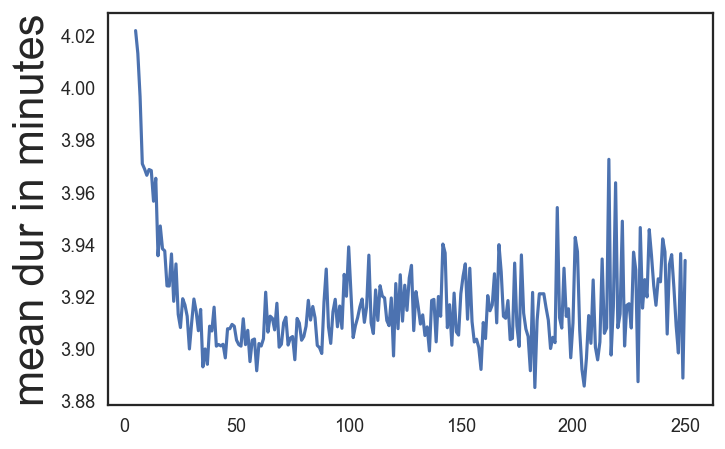

In [44]:
import matplotlib.pyplot as plt
plt.figure(dpi=130)
plt.plot(mean2)
plt.ylabel('mean dur in minutes')
plt.show()


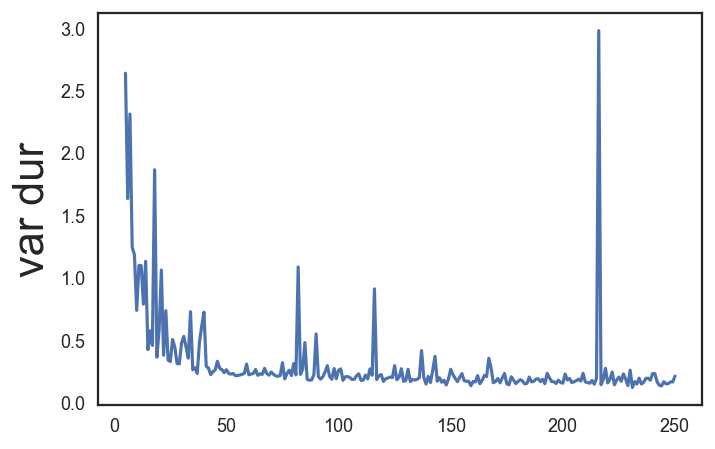

In [46]:
import matplotlib.pyplot as plt
plt.figure(dpi=130)
plt.plot(var2)
plt.ylabel('var dur (mins)')
plt.show()

In [52]:
np.argmax(var1[5:251])

211

In [53]:
var1[211]

590055385.5136331

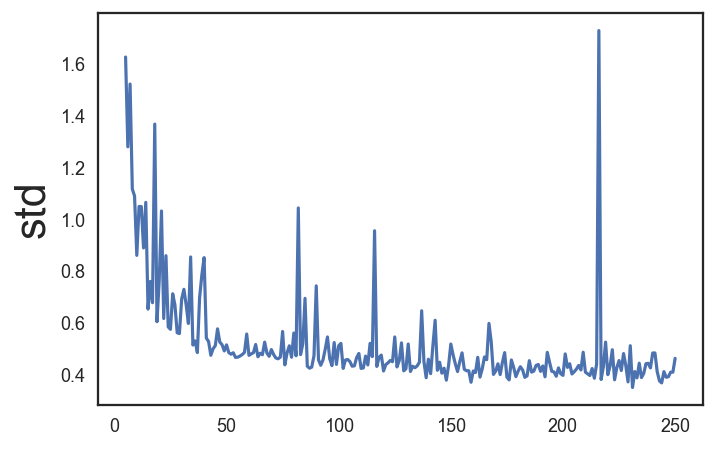

In [50]:
import matplotlib.pyplot as plt
plt.figure(dpi=130)
plt.plot(std2)
plt.ylabel('std')
plt.show()

seems like there are a lot of jazz lovers with 211 songs in their playlists. we might check if those are strange playlists. i tried a little but it seemed there isn't anything strange.


### check the playlists with 211 elements

(array([  7.,  17., 102., 497., 170.,  28.,  11.,   4.,   0.,   4.]),
 array([2.3457733 , 2.76957457, 3.19337583, 3.61717709, 4.04097836,
        4.46477962, 4.88858088, 5.31238215, 5.73618341, 6.15998468,
        6.58378594]),
 <a list of 10 Patch objects>)

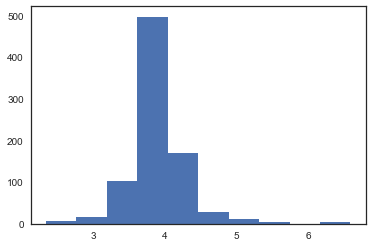

In [65]:
durations_211 = sorted( np.array( pl2.loc[pl2['num_tracks'] == 211]['duration_ms']) /211/60/1000)
plt.hist(durations_211)


(array([4.000e+00, 1.800e+01, 3.290e+02, 2.632e+03, 4.260e+02, 6.600e+01,
        2.300e+01, 7.000e+00, 2.000e+00, 1.000e+00]),
 array([0.69772844, 1.01898617, 1.3402439 , 1.66150164, 1.98275937,
        2.3040171 , 2.62527483, 2.94653257, 3.2677903 , 3.58904803,
        3.91030577]),
 <a list of 10 Patch objects>)

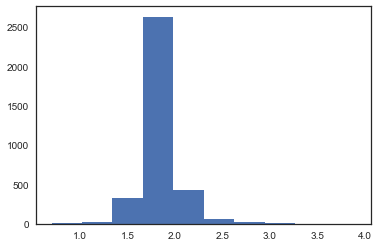

In [69]:
durations_50 = sorted( np.array( pl2.loc[pl2['num_tracks'] == 99]['duration_ms']) /211/60/1000)
plt.hist(durations_50)

In [171]:
pl3 = pl[['pid','num_tracks','duration_ms']]

In [175]:
pl3.head()


,pid,num_tracks,duration_ms
0,0,52,11532414
1,1,39,11656470
2,2,64,14039958
3,3,126,28926058
4,4,17,4335282


In [188]:
pl3.loc[pl3['num_tracks'] == 211].sort_values('duration_ms')

pid_d = pl3.loc[pl3['num_tracks'] == 211].duration_ms
pid = pl3.loc[pl3['num_tracks'] == 211].pid

pid_dur = pid_d.apply( lambda x : x/211/1000/60)
long_211_pls = pd.DataFrame([pid,pid_dur ] ).T.sort_values('duration_ms')
long_211_pls.head()


,pid,duration_ms
219496,296496.0,2.345773
323673,39673.0,2.499496
939878,944878.0,2.548419
359395,421395.0,2.658741
610281,648281.0,2.720801


In [189]:
long_211_pls.describe()

,pid,duration_ms
count,840.000000,840.000000
mean,485528.933333,3.895790
std,293058.185788,0.405092
min,847.000000,2.345773
25%,221485.250000,3.697551
50%,491938.500000,3.853239
75%,738033.250000,4.045820
max,999182.000000,6.583786
